In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linkedin-jobs-data-india/LinkedIn_Jobs_Data_India.csv


In [3]:
data=pd.read_csv('/kaggle/input/linkedin-jobs-data-india/LinkedIn_Jobs_Data_India.csv')
data.head()

,Unnamed: 0,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs
0,0,3800928381,2024-01-09,Front-end Engineer/Web Developer (SDE 1 &amp; 2),BOX8,3 weeks ago,85.0,"Skill: html5 , ajax , oop , git , postgresql ,...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
1,1,3800929078,2024-01-09,Android Developer-SDE 1 &amp; 2(Software Devel...,BOX8,3 weeks ago,80.0,"Skill: algorithms , rest , github , css , html...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
2,2,3792399495,2023-12-27,Web Developer,Mahe Technologies Private Limited,1 month ago,75.0,The ideal candidate is a creative problem solv...,Full-time,Executive,Engineering and Information Technology,Information Technology & Services,14387125,Greater Kolkata Area,NaN,No
3,3,3792604197,2023-12-27,Web Developer,Mahe Technologies Private Limited,1 month ago,52.0,The ideal candidate is a creative problem solv...,Full-time,Executive,Engineering and Information Technology,Information Technology & Services,14387125,Greater Kolkata Area,NaN,No
4,4,3808399427,2024-01-23,Software Engineer,Microsoft,1 week ago,26.0,Do you have a passion for security? Do you lik...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Hyderabad,Telangana,Yes


In [4]:
data.tail()

,Unnamed: 0,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs
944,1065,3811057159,2024-01-22,Production Engineer - Injection Molding,SKF India,1 week ago,87.0,About SKF\n\n\n\nSKF started its operations in...,Full-time,Associate,Production and Manufacturing,"Motor Vehicle Parts Manufacturing, Automation ...",1804161,Mysuru,Karnataka,Yes
945,1066,3791640836,2023-12-25,Mechanical Engineering,Ample Leap,1 month ago,49.0,Job Location: Pan India\n\nEducation: B. Tech ...,Full-time,Executive,Engineering and Information Technology,Business Consulting and Services,3706977,Mathura,Uttar Pradesh,No
946,1067,3781388877,2023-12-10,Mechanical Design Engineer,Vijaya Enterprises,1 month ago,39.0,Job Description\n\n\n * Resolve Issues related...,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,2313856,Navi Mumbai,Maharashtra,No
947,1070,3792393497,2023-12-02,Mechanical Engineer,GVR TECHNOLABS PRIVATE LIMITED,2 months ago,59.0,"Job Summary\n\nGVR Technolabs Pvt Ltd, an Info...",Full-time,Entry level,Engineering and Information Technology,Information Technology & Services,27956264,Visakhapatnam,Andhra Pradesh,No
948,1071,3795525413,2024-01-20,Piping Engineer,Infosys,1 week ago,93.0,"Primary skills: Piping Engineering, CAD, CATIA...",Full-time,Entry level,Engineering and Information Technology,IT Services and IT Consulting,1283,Bengaluru East,Karnataka,Yes


In [5]:
# Remove the 'Unnamed: 0' column from the DataFrame
data = data.drop(columns=['Unnamed: 0'])

# Display the first few rows to confirm the change
data.head()


,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs
0,3800928381,2024-01-09,Front-end Engineer/Web Developer (SDE 1 &amp; 2),BOX8,3 weeks ago,85.0,"Skill: html5 , ajax , oop , git , postgresql ,...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
1,3800929078,2024-01-09,Android Developer-SDE 1 &amp; 2(Software Devel...,BOX8,3 weeks ago,80.0,"Skill: algorithms , rest , github , css , html...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
2,3792399495,2023-12-27,Web Developer,Mahe Technologies Private Limited,1 month ago,75.0,The ideal candidate is a creative problem solv...,Full-time,Executive,Engineering and Information Technology,Information Technology & Services,14387125,Greater Kolkata Area,NaN,No
3,3792604197,2023-12-27,Web Developer,Mahe Technologies Private Limited,1 month ago,52.0,The ideal candidate is a creative problem solv...,Full-time,Executive,Engineering and Information Technology,Information Technology & Services,14387125,Greater Kolkata Area,NaN,No
4,3808399427,2024-01-23,Software Engineer,Microsoft,1 week ago,26.0,Do you have a passion for security? Do you lik...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Hyderabad,Telangana,Yes


In [6]:
missing_values = data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

publishedAt     92
contractType    89
workType        89
sector          89
state           78
dtype: int64


In [7]:
data.describe()

,id,applicationsCount,companyId
count,9.490000e+02,949.000000,9.490000e+02
mean,3.792384e+09,116.997893,2.203750e+07
std,4.712230e+07,73.459826,3.032733e+07
min,3.183047e+09,25.000000,1.009000e+03
25%,3.792604e+09,35.000000,2.100640e+05
50%,3.807319e+09,111.000000,8.848940e+06
75%,3.815206e+09,200.000000,3.358583e+07
max,3.820902e+09,200.000000,1.015515e+08


In [8]:
data.dtypes

id                        int64
publishedAt              object
title                    object
companyName              object
postedTime               object
applicationsCount       float64
description              object
contractType             object
experienceLevel          object
workType                 object
sector                   object
companyId                 int64
city                     object
state                    object
recently_posted_jobs     object
dtype: object

# **1. Job Market Trends Analysis**

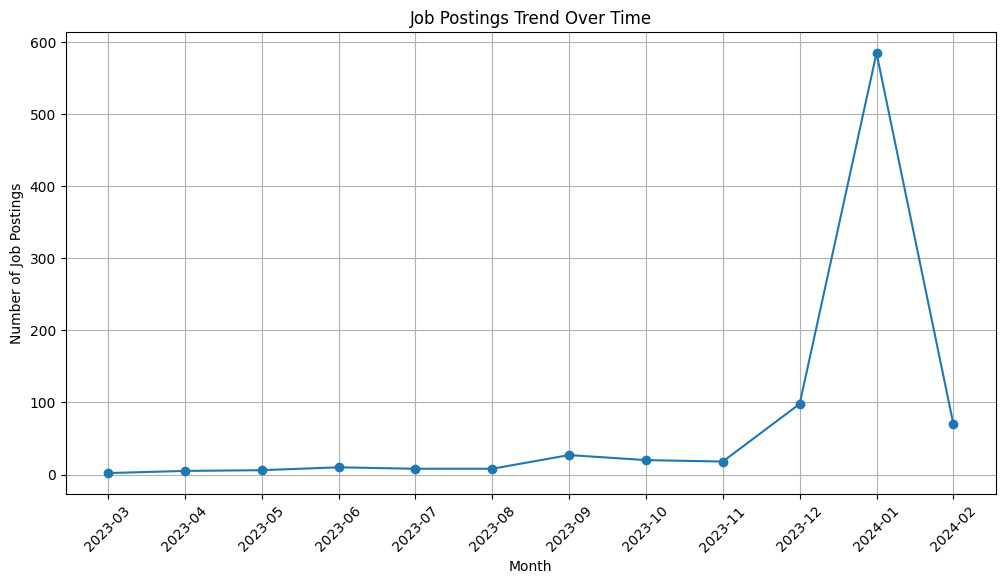

In [9]:
df=data
import matplotlib.pyplot as plt
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
df['year_month'] = df['publishedAt'].dt.to_period('M')
job_postings_trend = df.groupby('year_month').size().reset_index(name='job_postings_count')
plt.figure(figsize=(12, 6))
plt.plot(job_postings_trend['year_month'].astype(str), job_postings_trend['job_postings_count'], marker='o')
plt.xticks(rotation=45)
plt.title('Job Postings Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.grid(True)
plt.show()


# 2. Popular Industries and Companies Analysis

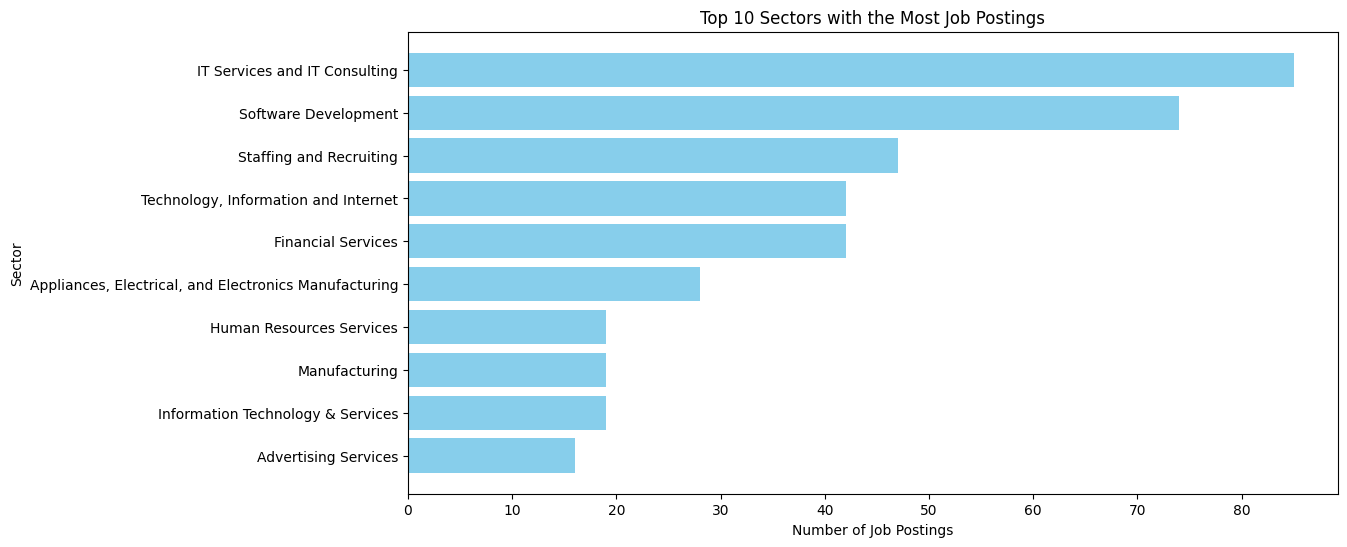

In [10]:
# Count the number of job postings per sector
sector_counts = df['sector'].value_counts().reset_index()
sector_counts.columns = ['sector', 'job_postings_count']

# Plot the top 10 sectors with the most job postings
plt.figure(figsize=(12, 6))
plt.barh(sector_counts['sector'].head(10), sector_counts['job_postings_count'].head(10), color='skyblue')
plt.xlabel('Number of Job Postings')
plt.ylabel('Sector')
plt.title('Top 10 Sectors with the Most Job Postings')
plt.gca().invert_yaxis()
plt.show()


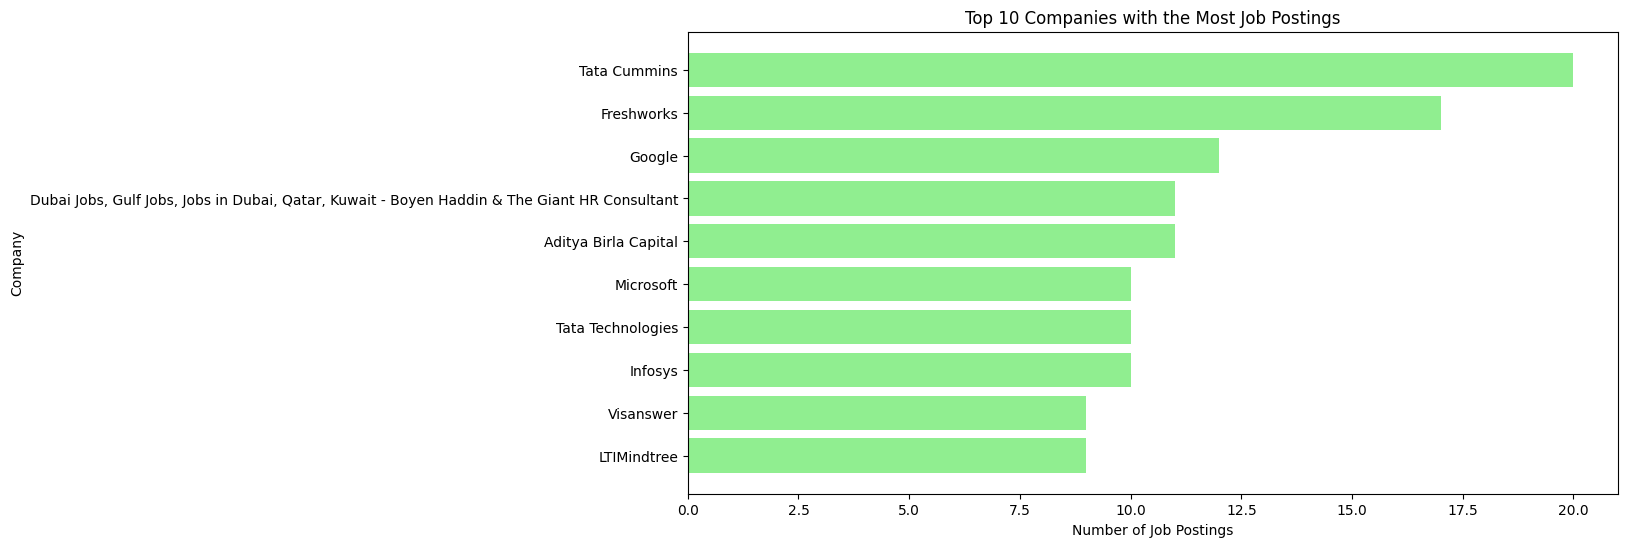

In [11]:
# Count the number of job postings per company
company_counts = df['companyName'].value_counts().reset_index()
company_counts.columns = ['companyName', 'job_postings_count']

# Plot the top 10 companies with the most job postings
plt.figure(figsize=(12, 6))
plt.barh(company_counts['companyName'].head(10), company_counts['job_postings_count'].head(10), color='lightgreen')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.title('Top 10 Companies with the Most Job Postings')
plt.gca().invert_yaxis()
plt.show()


# 3. Skill Demand

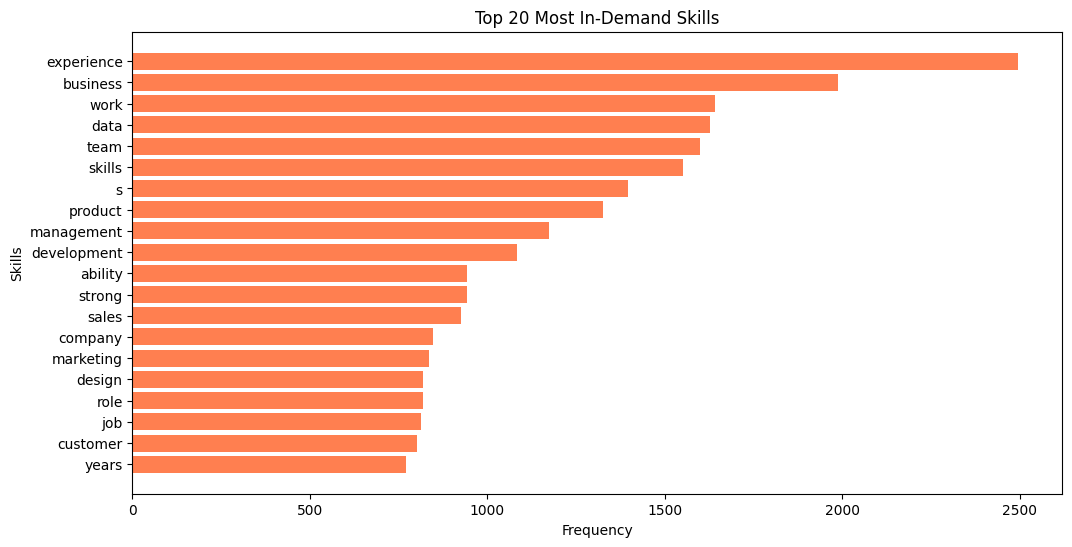

In [12]:
from collections import Counter
import re

# Combine all job descriptions into one text
all_descriptions = ' '.join(df['description'].dropna())

# Extract words (skills) from the text
words = re.findall(r'\b\w+\b', all_descriptions.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Remove common stopwords (optional)
stopwords = set(['and', 'the', 'to', 'a', 'of', 'in', 'for', 'with', 'on', 'is', 'at', 'as', 'by', 'an', 'or', 'be', 'this', 'that', 'which', 'from', 'it', 'you', 'are', 'we', 'will', 'can', 'all', 'they', 'your', 'have', 'more', 'but', 'our', 'not', 'has', 'any', 'their', 'also', 'if', 'other', 'such', 'may', 'new'])
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

# Get the most common skills
most_common_skills = Counter(filtered_word_counts).most_common(20)

# Plot the most common skills
skills, counts = zip(*most_common_skills)
plt.figure(figsize=(12, 6))
plt.barh(skills, counts, color='coral')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Top 20 Most In-Demand Skills')
plt.gca().invert_yaxis()
plt.show()


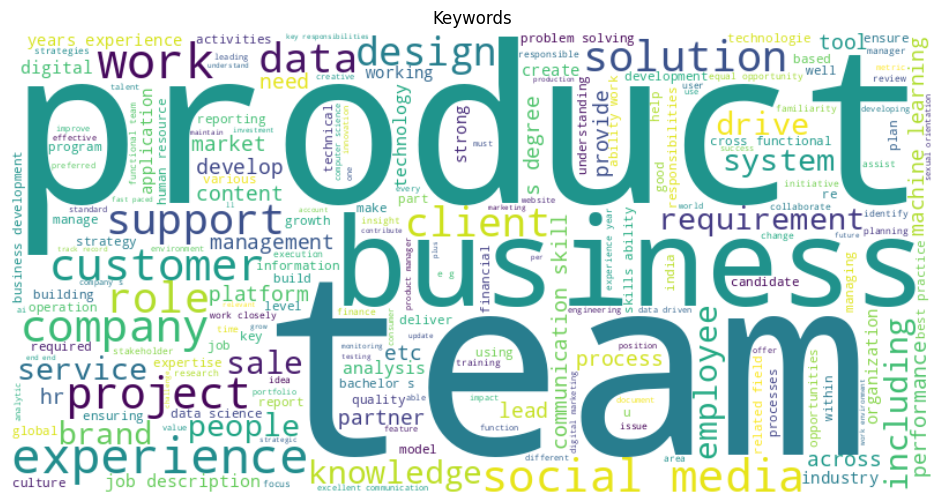

In [38]:
from wordcloud import WordCloud
filtered_words = [word for word in words if word not in stopwords]
filtered_text = ' '.join(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keywords')
plt.show()

# 4 Geographical Analysis

In [14]:
# Count the number of job postings per city
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'job_postings_count']

# Display the top 10 cities with the most job postings
print(city_counts.head(10))


        city  job_postings_count
0  Bengaluru                 196
1     Mumbai                 123
2   Gurugram                  67
3       Pune                  62
4  Hyderabad                  54
5    Chennai                  42
6      Noida                  31
7      India                  30
8    Gurgaon                  25
9      Delhi                  24


In [15]:
# Count the number of job postings per state
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'job_postings_count']

# Display the top 10 states with the most job postings
print(state_counts.head(10))


           state  job_postings_count
0      Karnataka                 245
1    Maharashtra                 215
2        Haryana                  96
3      Telangana                  60
4  Uttar Pradesh                  48
5     Tamil Nadu                  47
6        Gujarat                  39
7          India                  34
8          Delhi                  26
9      Rajasthan                  14


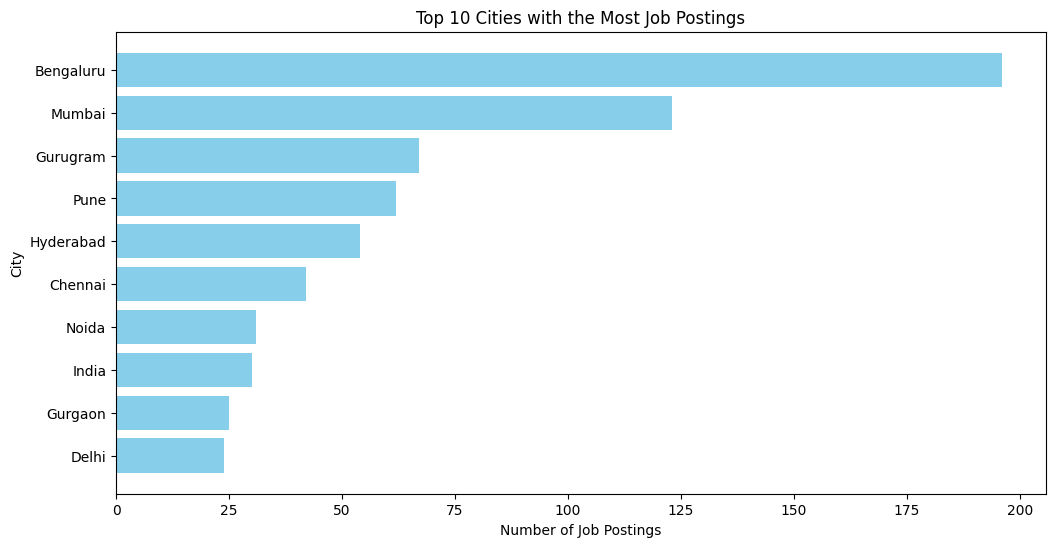

In [16]:
# Plot the top 10 cities with the most job postings
plt.figure(figsize=(12, 6))
plt.barh(city_counts['city'].head(10), city_counts['job_postings_count'].head(10), color='skyblue')
plt.xlabel('Number of Job Postings')
plt.ylabel('City')
plt.title('Top 10 Cities with the Most Job Postings')
plt.gca().invert_yaxis()
plt.show()



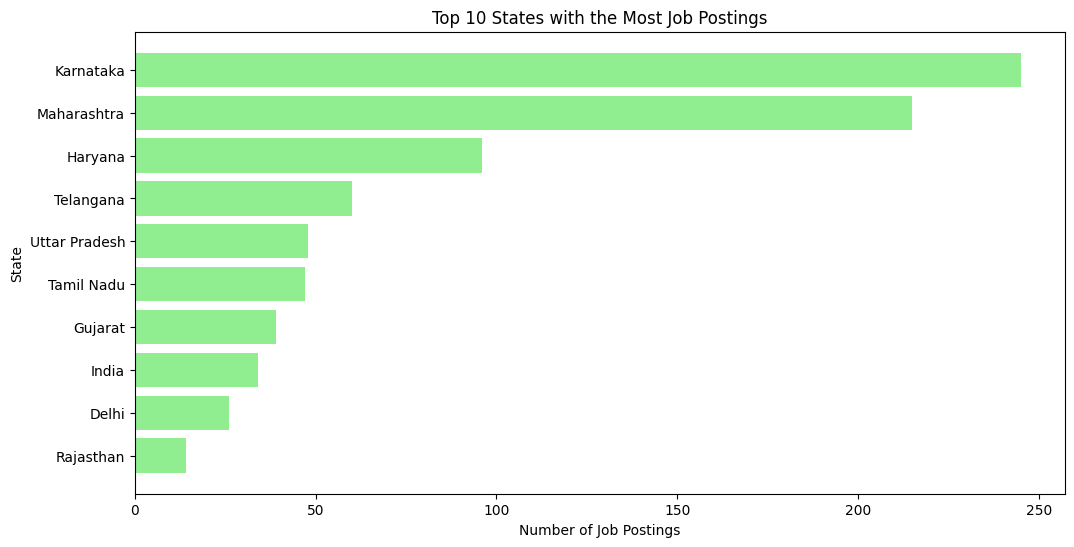

In [39]:
# Plot the top 10 states with the most job postings
plt.figure(figsize=(12, 6))
plt.barh(state_counts['state'].head(10), state_counts['job_postings_count'].head(10), color='lightgreen')
plt.xlabel('Number of Job Postings')
plt.ylabel('State')
plt.title('Top 10 States with the Most Job Postings')
plt.gca().invert_yaxis()
plt.show()

# 5 Experience Level Requirements

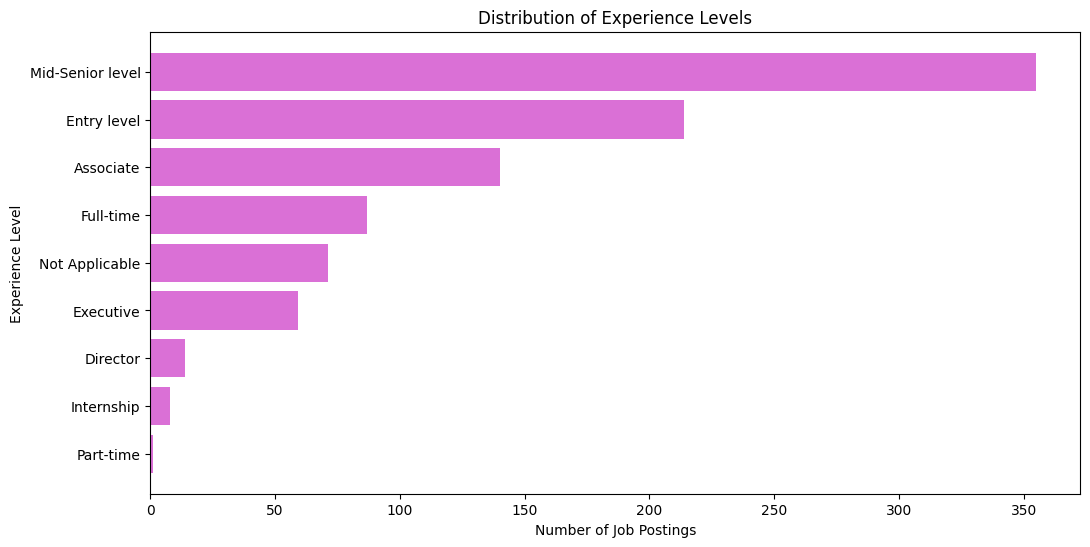

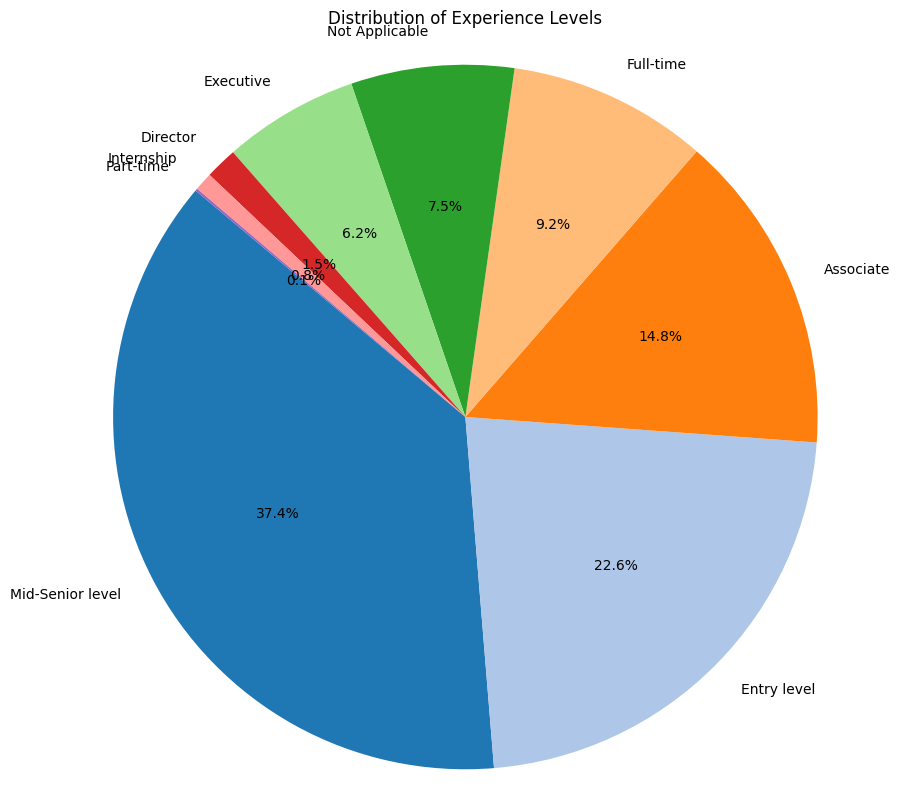

In [23]:
# Count the number of job postings per experience level
experience_counts = df['experienceLevel'].value_counts().reset_index()
experience_counts.columns = ['experienceLevel', 'job_postings_count']

# Plot the distribution of experience levels
plt.figure(figsize=(12, 6))
plt.barh(experience_counts['experienceLevel'], experience_counts['job_postings_count'], color='orchid')
plt.xlabel('Number of Job Postings')
plt.ylabel('Experience Level')
plt.title('Distribution of Experience Levels')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(experience_counts['job_postings_count'], labels=experience_counts['experienceLevel'], autopct='%1.1f%%', colors=plt.cm.tab20.colors, startangle=140)
plt.title('Distribution of Experience Levels')
plt.axis('equal')
plt.show()

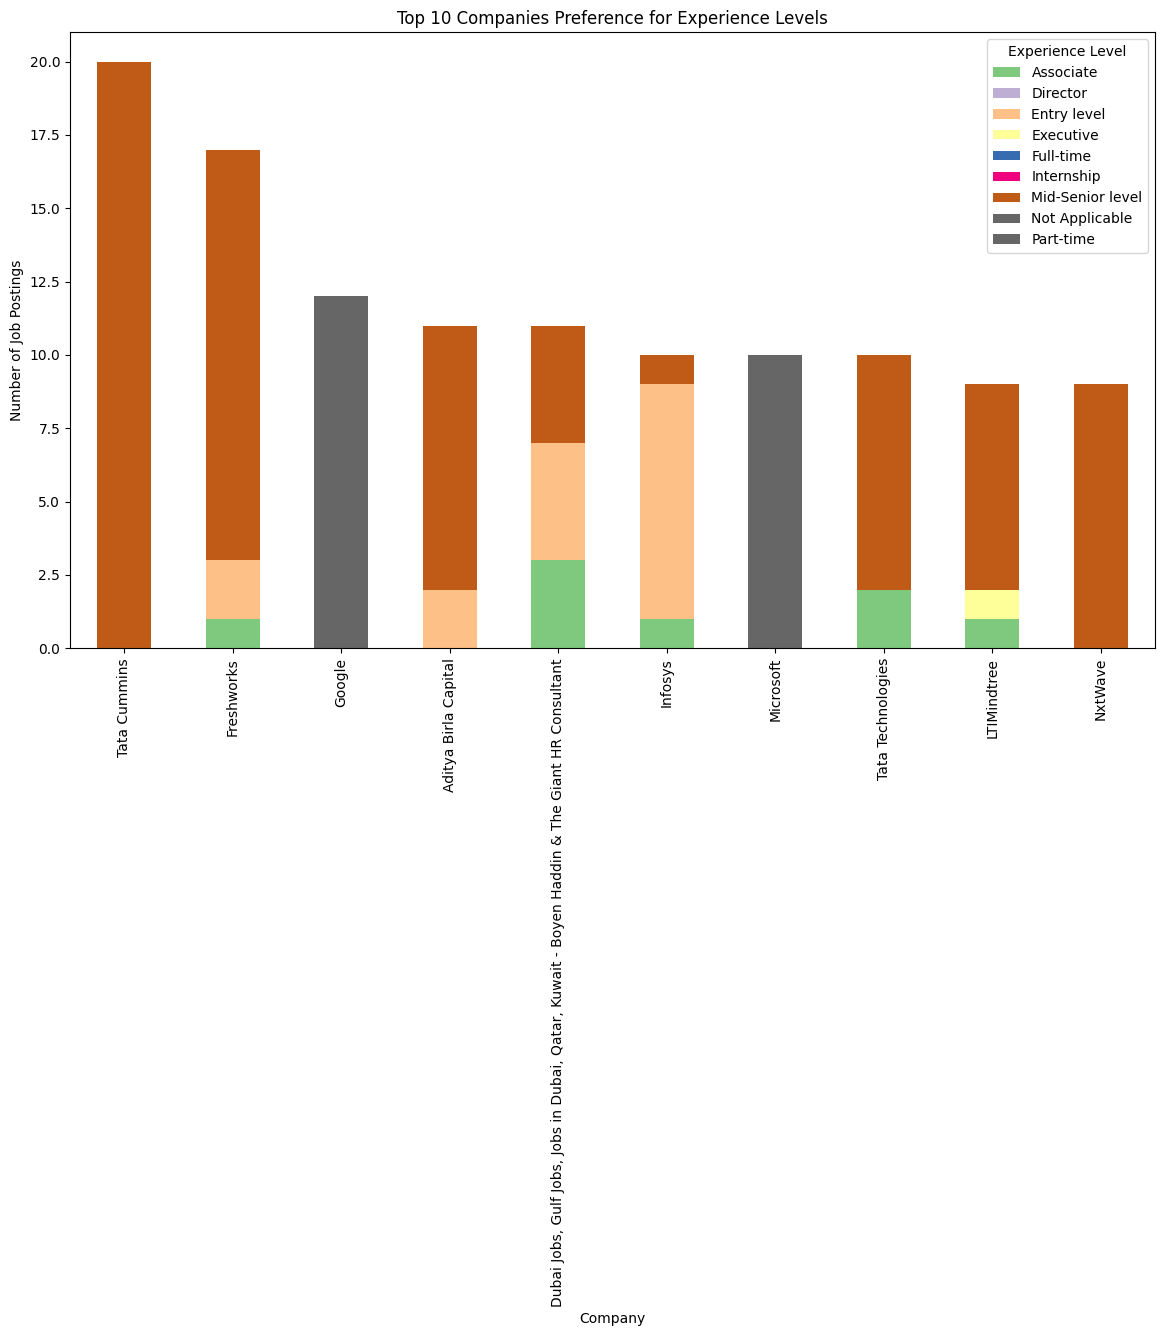

In [19]:
# Count the number of job postings per experience level in each company
company_experience_counts = df.groupby(['companyName', 'experienceLevel']).size().unstack(fill_value=0)

# Plot the top 10 companies' preference for experience levels
top_companies = company_experience_counts.sum(axis=1).nlargest(10).index
top_company_experience_counts = company_experience_counts.loc[top_companies]

top_company_experience_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Accent')
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 Companies Preference for Experience Levels')
plt.legend(title='Experience Level')
plt.show()



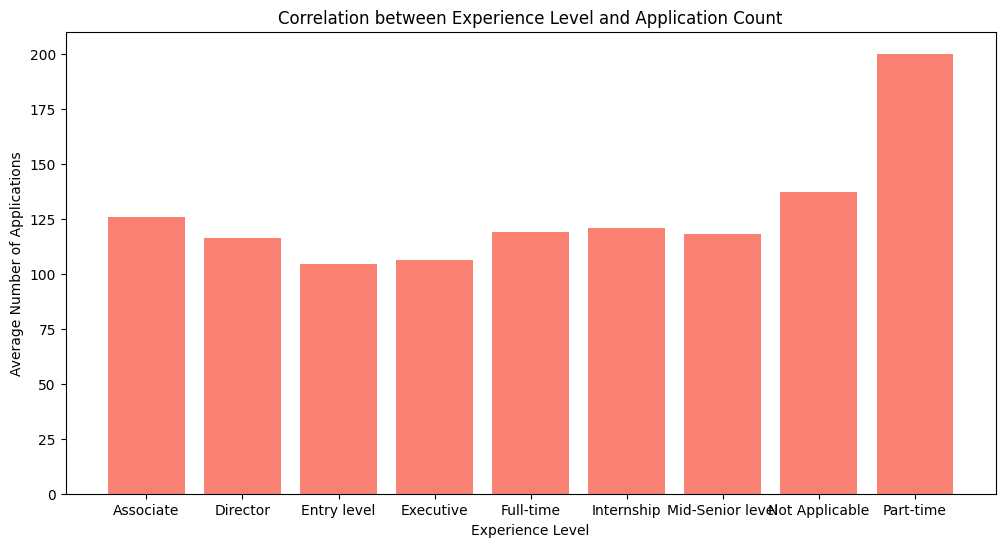

In [20]:
# Calculate the average number of applications received per experience level
experience_applications = df.groupby('experienceLevel')['applicationsCount'].mean().reset_index()

# Plot the correlation between experience level and application count
plt.figure(figsize=(12, 6))
plt.bar(experience_applications['experienceLevel'], experience_applications['applicationsCount'], color='salmon')
plt.xlabel('Experience Level')
plt.ylabel('Average Number of Applications')
plt.title('Correlation between Experience Level and Application Count')
plt.show()


In [21]:
experience_mapping = {
    'Entry': 1,
    'Associate': 2,
    'Mid-Senior': 3,
    'Director': 4,
    'Executive': 5,
    'Internship': 6
}

df['experienceLevelEncoded'] = df['experienceLevel'].map(experience_mapping)

# Calculate the correlation
correlation = df['applicationsCount'].corr(df['experienceLevelEncoded'], method='spearman')

# Display the correlation coefficient
print("Correlation between number of applications and experience level:", correlation)

Correlation between number of applications and experience level: -0.13836430064913605


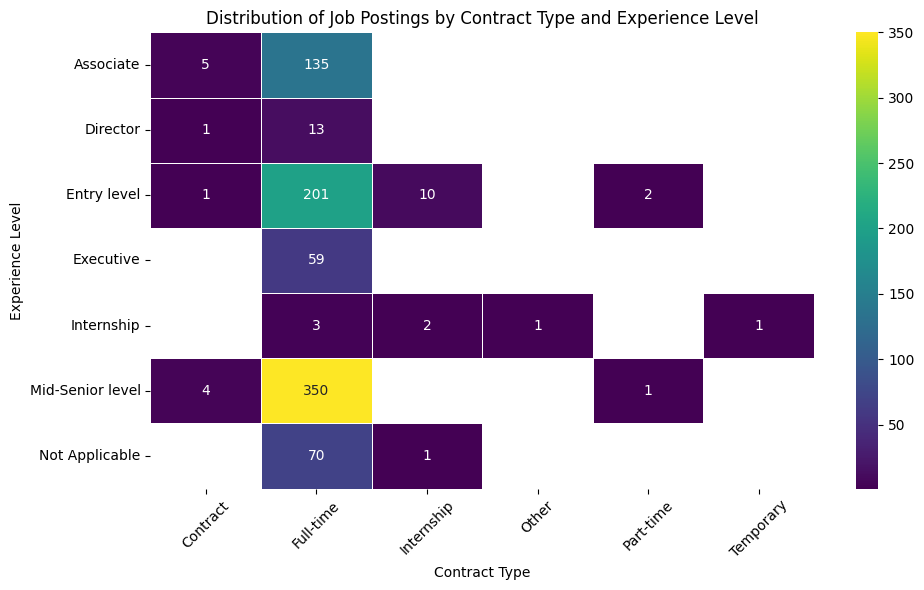

In [22]:
import seaborn as sns
pivot_df = df.pivot_table(index='experienceLevel', columns='contractType', values='title', aggfunc='count')

# Create a heatmap to visualize the distribution of job postings by contract type and experience level
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap='viridis', annot=True, fmt='g', linewidths=0.5)
plt.title('Distribution of Job Postings by Contract Type and Experience Level')
plt.xlabel('Contract Type')
plt.ylabel('Experience Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.tight_layout()
plt.show()

In [24]:
filtered_df = data[((data['experienceLevel'] == 'Entry level') & (data['sector'] == 'IT Services and IT Consulting') | (data['sector'] == 'Staffing and Recruiting'))]
filtered_df

,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs,year_month,experienceLevelEncoded
0,3800928381,2024-01-09,Front-end Engineer/Web Developer (SDE 1 &amp; 2),BOX8,3 weeks ago,85.0,"Skill: html5 , ajax , oop , git , postgresql ,...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No,2024-01,NaN
1,3800929078,2024-01-09,Android Developer-SDE 1 &amp; 2(Software Devel...,BOX8,3 weeks ago,80.0,"Skill: algorithms , rest , github , css , html...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No,2024-01,NaN
31,3800919967,2024-01-09,Web / UI Developer (HTML5 / CSS3 / JavaScript),OptiRisk India,3 weeks ago,123.0,"Skill: html5 , ajax , xml , json , debugging ,...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,840297,Chennai,Tamil Nadu,No,2024-01,NaN
45,3800928532,2024-01-09,Web Developer,Sumago Infotech Pvt. Ltd.,3 weeks ago,92.0,"Skill: css , html5 , web developer , php , boo...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,76330124,Nashik,Maharashtra,No,2024-01,NaN
54,3808384874,2024-01-23,Software Engineer,Infinite Computer Solutions,1 week ago,25.0,18057BR\n\nGurgaon\n\nJob Description\n\nProgr...,Full-time,Entry level,Engineering and Information Technology,IT Services and IT Consulting,11115,Gurgaon,Haryana,Yes,2024-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,3781426102,2023-12-10,Plant Vehicle Engineer,"Dubai Jobs, Gulf Jobs, Jobs in Dubai, Qatar, K...",1 month ago,67.0,This position is to encourage candidates to ap...,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,926408,Halol,Gujarat,No,2023-12,NaN
937,3816934057,2024-01-05,Jr engineer-Mechanical,CIEL HR,4 weeks ago,25.0,We are looking for a Junior engineer-Mechanica...,Full-time,Entry level,Other,IT Services and IT Consulting,10083363,Rajasthan,India,No,2024-01,NaN
938,3731639372,2023-10-03,Engineer Mechanical,"Dubai Jobs, Gulf Jobs, Jobs in Dubai, Qatar, K...",4 months ago,200.0,Key Responsibility Areas: (Mandatory)\n\n\n\n\...,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,926408,Ramanagar,Karnataka,No,2023-10,NaN
946,3781388877,2023-12-10,Mechanical Design Engineer,Vijaya Enterprises,1 month ago,39.0,Job Description\n\n\n * Resolve Issues related...,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,2313856,Navi Mumbai,Maharashtra,No,2023-12,NaN


In [25]:
filtered_df = data[((data['contractType'] == 'Full-time') | (data['contractType'] == 'Permanent')) & ((data['sector'] == 'Software Development') | (data['sector'] == 'Financial Services'))]
filtered_df

,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs,year_month,experienceLevelEncoded
4,3808399427,2024-01-23,Software Engineer,Microsoft,1 week ago,26.0,Do you have a passion for security? Do you lik...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Hyderabad,Telangana,Yes,2024-01,NaN
5,3803684281,2024-01-17,Software Engineer,Microsoft,2 weeks ago,200.0,Microsoft Endpoint Manager (MEM) Is An Integra...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Noida,Uttar Pradesh,No,2024-01,NaN
21,3808000044,2024-01-22,Software Engineer,Microsoft,1 week ago,120.0,Security represents the most critical prioriti...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Hyderabad,Telangana,Yes,2024-01,NaN
22,3807487394,2024-01-22,Software Engineer,Intuit,1 week ago,139.0,Overview:\n\n\n\nCome join the ProConnect team...,Full-time,Mid-Senior level,Engineering and Information Technology,Software Development,1666,Bengaluru,Karnataka,Yes,2024-01,NaN
24,3800587016,2024-01-12,Software Engineer Test,PhonePe,3 weeks ago,200.0,About PhonePe\n\nPhonePe is India’s leading di...,Full-time,Mid-Senior level,Engineering and Information Technology,Software Development,10479149,Bangalore Urban,Karnataka,No,2024-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,3813504011,2024-01-25,Editor (Content Writer) - Mumbai,Nielsen,1 week ago,29.0,"At Nielsen, we believe that career growth is a...",Full-time,Not Applicable,"Marketing, Public Relations, and Writing/Editing",Software Development,1714,Mumbai,Maharashtra,Yes,2024-01,NaN
798,3787871655,2024-01-03,Content Writer,Livspace,1 month ago,200.0,ABOUT US\n\n\n\n\nLivspace is Asiaʼs largest a...,Full-time,Associate,"Design, Art/Creative, and Marketing",Software Development,2963287,Bangalore Urban,Karnataka,No,2024-01,2.0
804,3802065898,2024-01-15,Finance Copywriter,Groww,2 weeks ago,52.0,About Groww\n\n\n\n\nWe are a passionate group...,Full-time,Associate,"Writing/Editing, Marketing, and Finance",Financial Services,10813156,Bengaluru,Karnataka,No,2024-01,2.0
822,3769027853,2024-01-12,Copywriter,INDmoney,3 weeks ago,67.0,"As a Copywriter, you will be involved in creat...",Full-time,Mid-Senior level,Marketing,Financial Services,14406593,Gurugram,Haryana,No,2024-01,NaN


# 6 Application Count Analysis

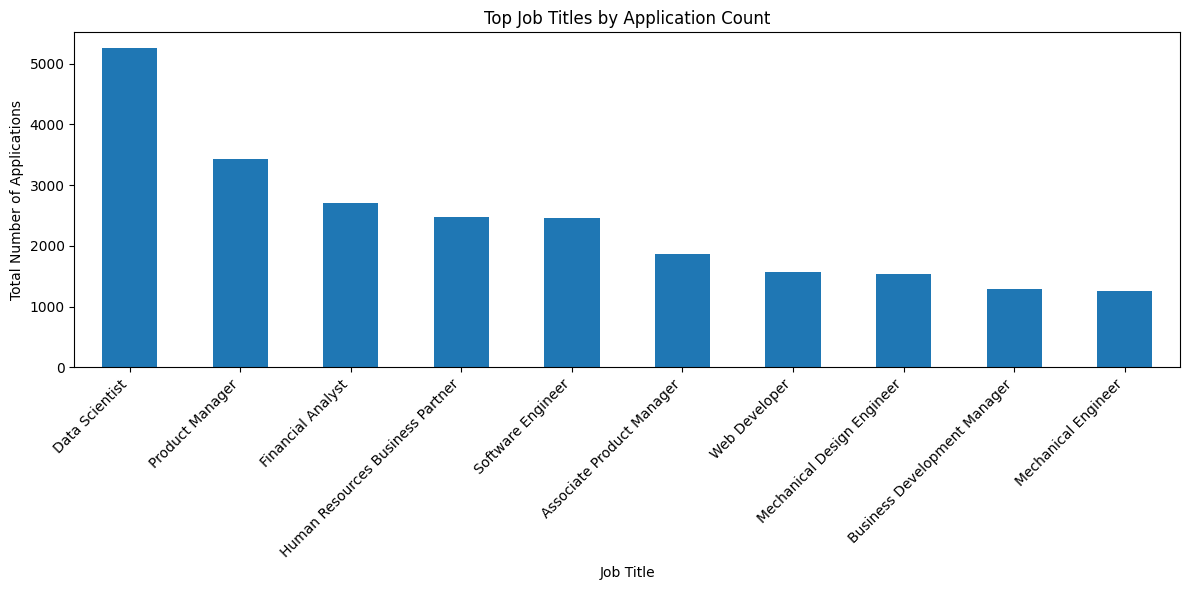

In [29]:
grouped_data = df.groupby(['title', 'sector', 'companyName', 'publishedAt'])

# Calculate the total number of job applications received for each group
application_counts = grouped_data['applicationsCount'].sum().reset_index()

# Analyze the factors influencing application count

# Plot the top job titles by application count
top_job_titles = application_counts.groupby('title')['applicationsCount'].sum().nlargest(10)
top_job_titles.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Job Title')
plt.ylabel('Total Number of Applications')
plt.title('Top Job Titles by Application Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

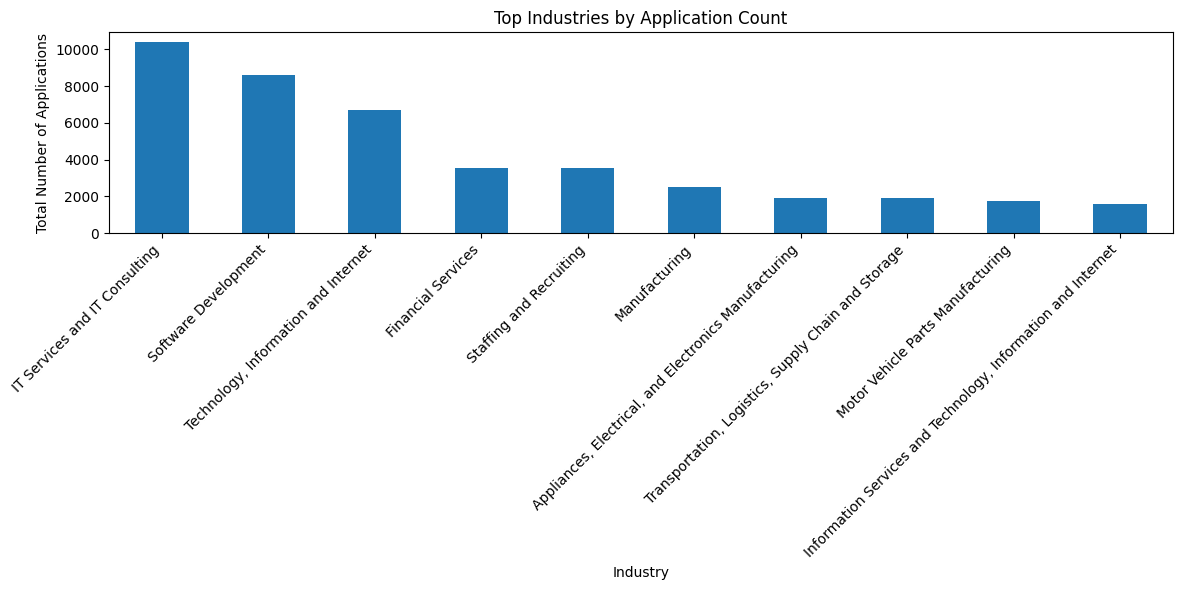

In [30]:
# Plot the top industries by application count
top_industries = application_counts.groupby('sector')['applicationsCount'].sum().nlargest(10)
top_industries.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Industry')
plt.ylabel('Total Number of Applications')
plt.title('Top Industries by Application Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

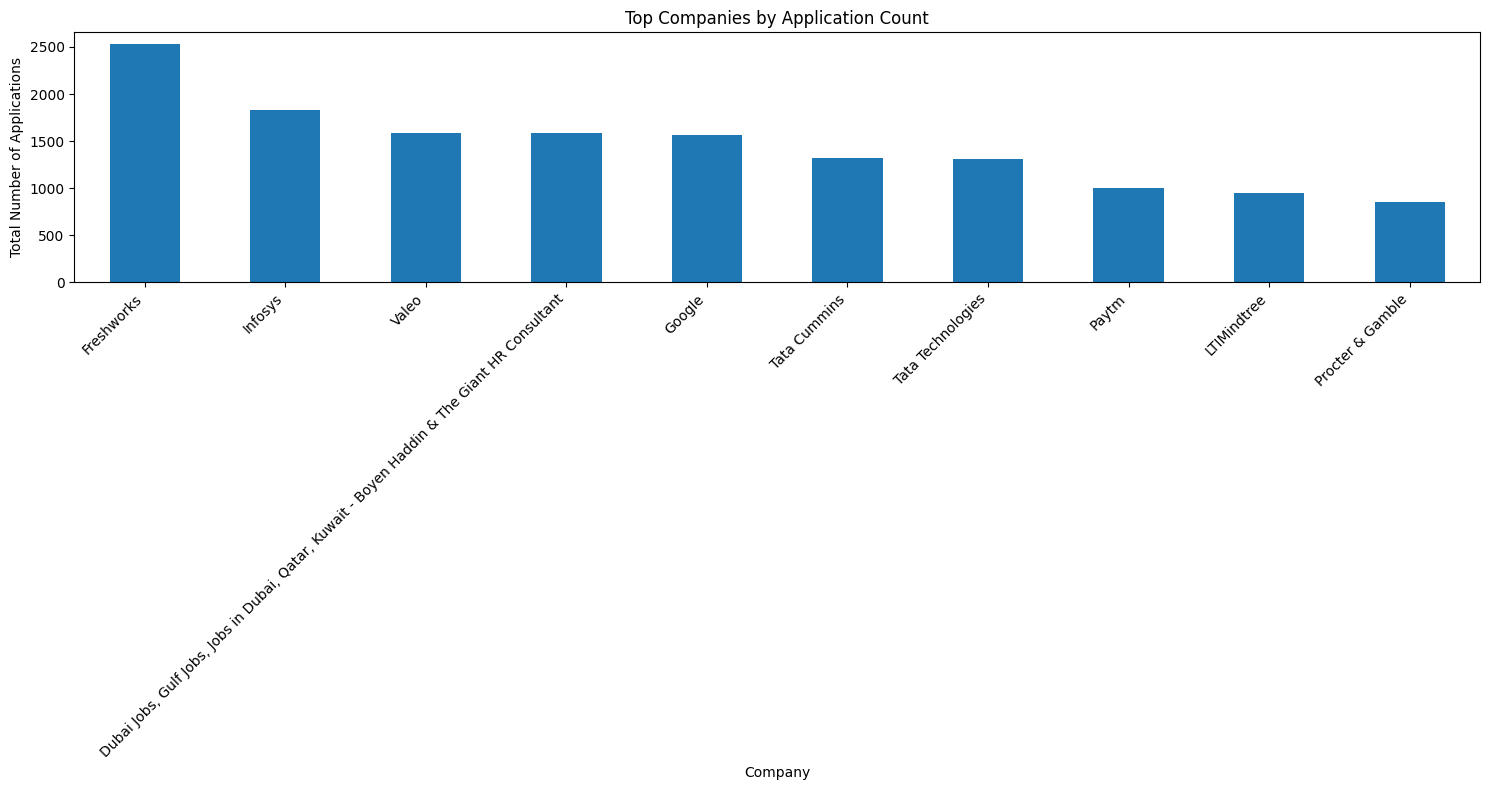

In [32]:
# Plot the top companies by application count
top_companies = application_counts.groupby('companyName')['applicationsCount'].sum().nlargest(10)
top_companies.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Company')
plt.ylabel('Total Number of Applications')
plt.title('Top Companies by Application Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

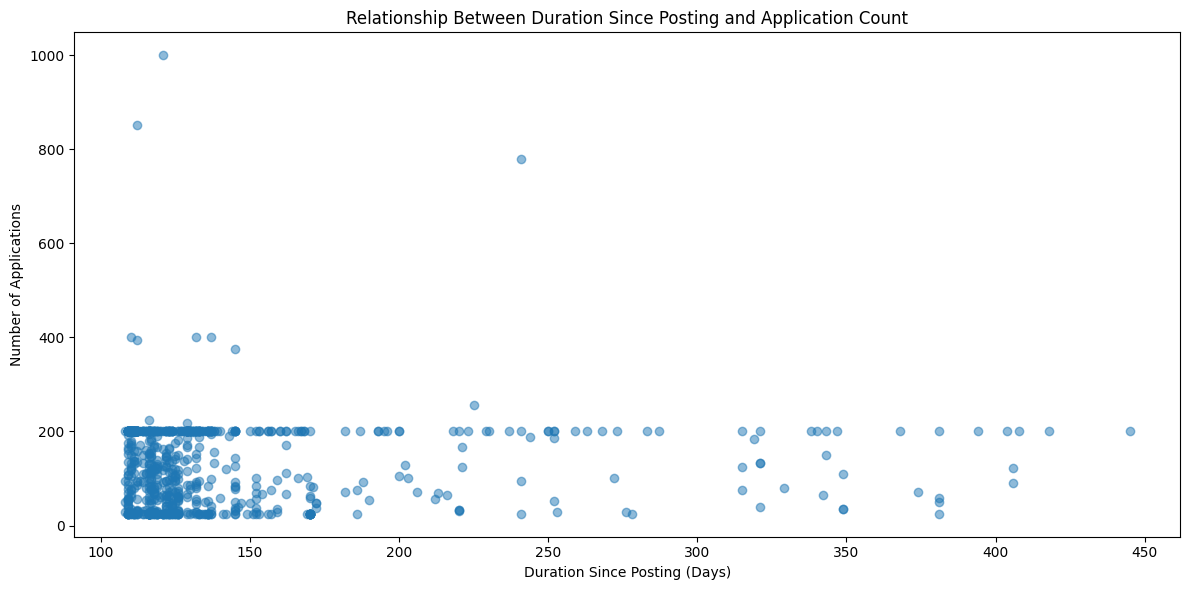

In [33]:
application_counts['publishedAt'] = pd.to_datetime(application_counts['publishedAt'])
application_counts['duration_since_posting'] = (pd.Timestamp.now() - application_counts['publishedAt']).dt.days

# Plot the relationship between duration since posting and application count
plt.figure(figsize=(12, 6))
plt.scatter(application_counts['duration_since_posting'], application_counts['applicationsCount'], alpha=0.5)
plt.xlabel('Duration Since Posting (Days)')
plt.ylabel('Number of Applications')
plt.title('Relationship Between Duration Since Posting and Application Count')
plt.tight_layout()
plt.show()